<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/02-linear-regression/LinearRegression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

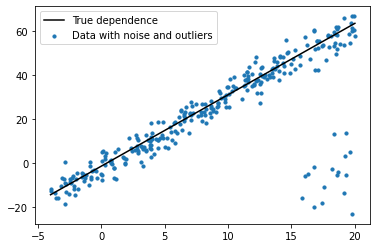

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
    x = np.random.uniform(*limits, size=N)
    y = true_function(x) + noize_function(x)

    return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

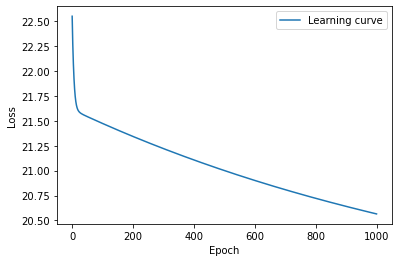

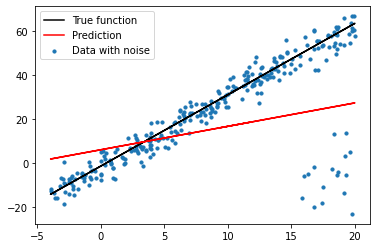

In [3]:
# MAE = 1/N * sum(abs(y - X * w - w_0))
w_0 = np.random.random()
w = np.random.random()

loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.0001

# Training loop
for _ in range(1000):
    array = (y >= (X * w + w_0)).astype(int)
    array = np.select([array == 0], [-1], array)
    gradient_w = np.sum(-array * X) / X.shape[0]
    w -= learning_rate * gradient_w
    gradient_w_0 = np.sum(-array) / X.shape[0]
    w_0 -= learning_rate * gradient_w_0
    loss_values.append(
      (abs(X * w + w_0 - y)).mean()
                      )



plt.plot(loss_values, label='Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.scatter(X, y, s=10, label='Data with noise')
plt.plot(X, true_function(X), label='True function', color='black')
plt.plot(X, X * w + w_0, label='Prediction', color='red')
plt.legend()

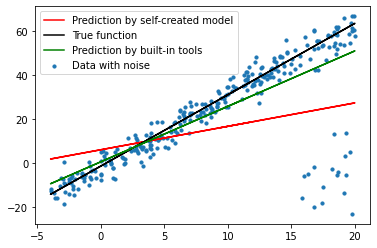

In [4]:
#Using in-built method for Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
prediction = model.predict(X)
prediction = prediction[:, np.newaxis]
plt.plot(X, X * w + w_0, color='red', label='Prediction by self-created model')
plt.plot(X, true_function(X), color='black', label='True function')
plt.plot(X, prediction, color='green', label='Prediction by built-in tools')
plt.scatter(X, y, s=10, label='Data with noise')
plt.legend()

As we can observe from the picture above, line, created by in-built instruments lies between the true function plot and prediction, created by our own model. 
I can make a supposition, that's a consequence of parameters, provided by built-in method (e.g. another loss function is incorporated), that's we're facing difference.

## Task 2 (2 + 1 points)

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**

In [5]:
from sklearn.base import BaseEstimator, RegressorMixin

In [6]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    def __init__(self, loss="MAE"):
        self.w = np.random.random()
        self.w_0 = np.random.random()
        self.learning_rate = 0.0001
        self.losses = []
        self.loss_function = loss

    def fit(self, x, y):
        for _ in range(1000):
            self.array = (y >= (x * self.w + self.w_0)).astype(int)
            self.array = np.select([self.array == 0], [-1], self.array)
            self.gradient_w = np.sum(-self.array * x) / x.shape[0]
            self.w -= self.learning_rate * self.gradient_w
            self.gradient_w_0 = np.sum(-self.array) / x.shape[0]
            self.w_0 -= self.learning_rate * self.gradient_w_0
            self.losses.append((abs(x * self.w + self.w_0 - y)).mean())
        return self.losses

    def predict(self, x):
        self.prediction = x * self.w + self.w_0
        return self.prediction
    
    def fit_predict(self, x, y):
        self.model = LinearRegression().fit(x, y)
        self.model_predictions = self.model.predict(x)
        self.model_prediction = self.model_prediction[:, np.newaxis]


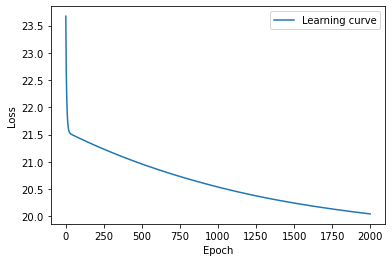

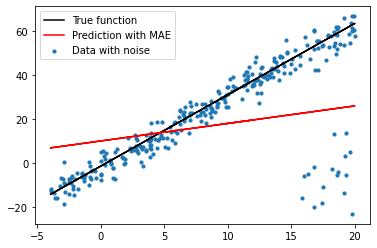

In [7]:
dataset = LinearRergessionSGD()
dataset.fit(X, y)
plt.plot(dataset.fit(X, y), label='Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.scatter(X, y, s=10, label='Data with noise')
plt.plot(X, true_function(X), label='True function', color='black')
plt.plot(X, dataset.predict(X), label='Prediction with MAE', color='red')
plt.legend()

Now let's devise a class with the possibility to pick a loss function:

In [8]:
class LinearRergessionSGD_loss_function_optional(BaseEstimator, RegressorMixin):
    def __init__(self, loss="MAE"):
        self.w = np.random.random()
        self.w_0 = np.random.random()
        self.learning_rate = 0.0001
        self.losses = []
        self.loss_function = loss

    def fit(self, x, y):
        self.w_1 = np.zeros(shape=x.shape[1])
        if self.loss_function == "MAE":
            for _ in range(1000):
                self.array = (y >= (x * self.w + self.w_0)).astype(int)
                self.array = np.select([self.array == 0], [-1], self.array)
                self.gradient_w = np.sum(-self.array * x) / x.shape[0]
                self.w -= self.learning_rate * self.gradient_w
                self.gradient_w_0 = np.sum(-self.array) / x.shape[0]
                self.w_0 -= self.learning_rate * self.gradient_w_0
                self.losses.append((abs(x * self.w + self.w_0 - y)).mean())
        elif self.loss_function == "MSE":
            for _ in range(1000):
                self.gradient = -2 * (x.T @ (y - x @ self.w_1)) / x.shape[0]
                self.w_1 -= self.learning_rate * self.gradient
                self.losses.append(
                      ((x @ self.w_1 - y)**2).mean())
        return np.array(self.losses)

    def predict(self, x):
        if self.loss_function == "MAE":
            self.prediction = x * self.w + self.w_0
        elif self.loss_function == "MSE":
            self.prediction = x @ self.w_1
        return self.prediction
    
    def fit_predict(self, x, y):
        self.model = LinearRegression().fit(x, y)
        self.model_predictions = self.model.predict(x)
        self.model_prediction = self.model_prediction[:, np.newaxis]


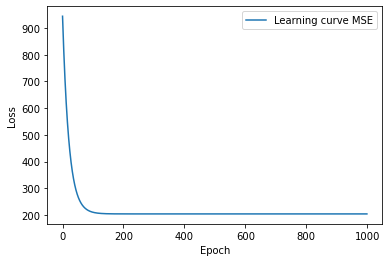

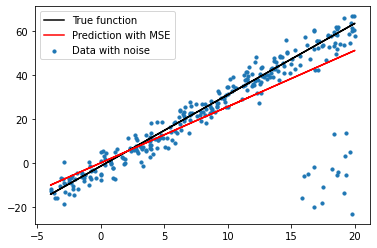

In [9]:
dataset_1 = LinearRergessionSGD_loss_function_optional("MSE")
plt.show()
plt.plot(dataset_1.fit(X, y), label='Learning curve MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.scatter(X, y, label='Data with noise', s=10)
plt.plot(X, true_function(X), label='True function', color='black')
plt.plot(X, dataset_1.predict(X), label='Prediction with MSE', color='r')
plt.legend()

Created class provides an opportunity to compare results for different loss functions. 
As we can conclude, MAE loss function tends to take into account outliers more likely than MSE loss function.